logspace:

11/22/2024 03:20:08 PM Total snapshots: 555
11/22/2024 03:20:09 PM Load IC file from all_ICs.json
11/22/2024 03:20:09 PM X shape: (555, 10), Y shape: (555, 16), model_err shape: (555, 16)
11/22/2024 03:20:09 PM X shape: (555, 10), Y shape: (555, 16), model_err shape: (555, 16)
11/22/2024 03:20:09 PM Number of parameters: 16
11/22/2024 03:20:09 PM Number of parameters: 16
11/22/2024 03:20:09 PM moved -1 steps out of 555 sims to find a non-nan median
11/22/2024 03:20:09 PM moved -1 steps out of 555 sims to find a non-nan median
11/22/2024 03:20:09 PM None
11/22/2024 03:20:09 PM None


╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │ value          │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪════════════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 1.0            │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (10,)   │ float64 │ [1., 1., 1.... │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 1.0            │
╘═════════════════════════╧═══════════╧═

11/22/2024 03:20:11 PM trained hyperparameters: lengthscales: [9.56397668e-02 2.75537914e-01 1.51484091e+03 1.01030929e-01
 1.95220251e-01 8.91997950e-01 5.50384911e-01 5.95282660e+03
 2.17412684e+03 2.26822354e+03]
11/22/2024 03:20:11 PM trained hyperparameters: lengthscales: [9.56397668e-02 2.75537914e-01 1.51484091e+03 1.01030929e-01
 1.95220251e-01 8.91997950e-01 5.50384911e-01 5.95282660e+03
 2.17412684e+03 2.26822354e+03]
11/22/2024 03:20:11 PM trained hyperparameters: variance: 1.4887612339940308
11/22/2024 03:20:11 PM trained hyperparameters: variance: 1.4887612339940308
/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-HETDEX-cosmo/emu/plot.py:175: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 30)


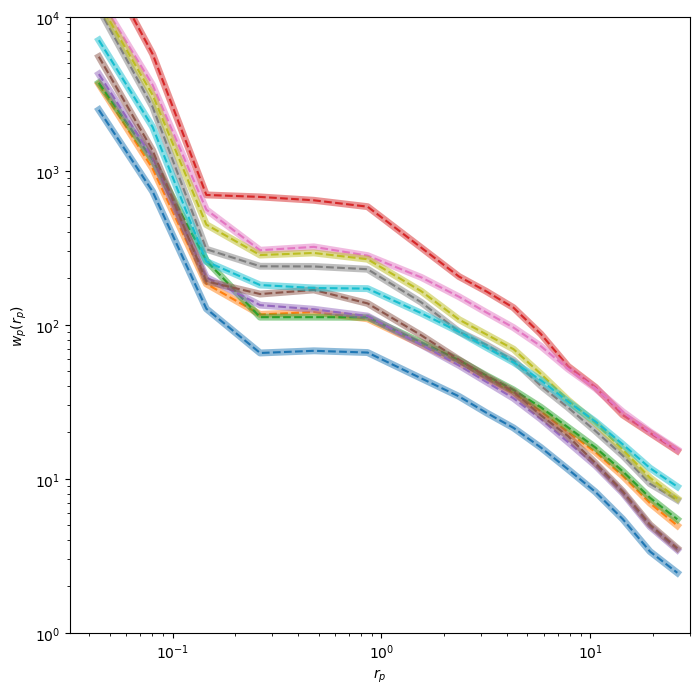

In [2]:
import importlib
import wp_emus
import plot
import h5py
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(wp_emus)

loglog_single_fid = wp_emus.LogLogSingleFid(data_dir='/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected_corrected/', fid='L2', logging_level='INFO')
pred, truth, rp = loglog_single_fid.train_pred_all_sims()

plot_emu = plot.PlotProjCorrEmu()

plot_emu.pred_truth(pred, truth, rp)

## LOO:

2024-11-22 14:00:00.387650: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-22 14:00:00.480281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-22 14:00:00.480301: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-22 14:00:00.506365: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 14:00:00.948898: W tensorflow/stream_executor/platform/de

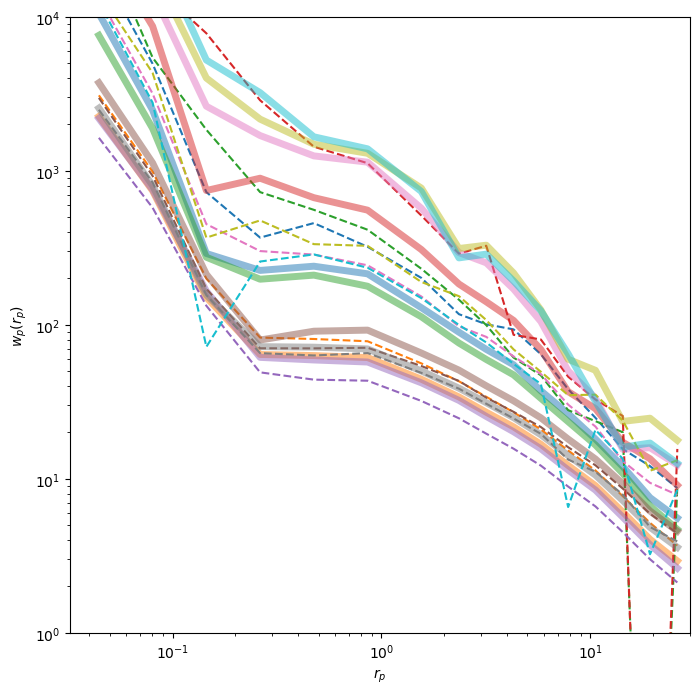

In [1]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)

plot_wp_emu = plot.PlotProjCorrEmu()
savefile= '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected_corrected/train/loo_pred.hdf5'
plot_wp_emu.loo_pred_truth(savefile=savefile)

The training data is crazy!

## Test single-fid:

11/22/2024 03:20:28 PM X shape: (200, 10), Y shape: (200, 16), model_err shape: (200, 16)
11/22/2024 03:20:28 PM X shape: (200, 10), Y shape: (200, 16), model_err shape: (200, 16)
11/22/2024 03:20:28 PM X shape: (200, 10), Y shape: (200, 16), model_err shape: (200, 16)
11/22/2024 03:20:28 PM X shape: (200, 10), Y shape: (200, 16), model_err shape: (200, 16)
11/22/2024 03:20:28 PM Number of parameters: 16
11/22/2024 03:20:28 PM Number of parameters: 16
11/22/2024 03:20:28 PM Number of parameters: 16
11/22/2024 03:20:28 PM Number of parameters: 16
11/22/2024 03:20:28 PM moved -1 steps out of 200 sims to find a non-nan median
11/22/2024 03:20:28 PM moved -1 steps out of 200 sims to find a non-nan median
11/22/2024 03:20:28 PM moved -1 steps out of 200 sims to find a non-nan median
11/22/2024 03:20:28 PM moved -1 steps out of 200 sims to find a non-nan median
11/22/2024 03:20:28 PM None
11/22/2024 03:20:28 PM None
11/22/2024 03:20:28 PM None
11/22/2024 03:20:28 PM None


╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │ value          │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪════════════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 1.0            │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (10,)   │ float64 │ [1., 1., 1.... │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 1.0            │
╘═════════════════════════╧═══════════╧═

11/22/2024 03:20:29 PM trained hyperparameters: lengthscales: [8.39707988e+03 4.51703405e+01 5.14798470e+00 1.09241100e+01
 4.57357452e+00 1.35769851e+01 1.56082996e+01 8.57832379e+02
 6.12653180e+03 7.95287654e+03]
11/22/2024 03:20:29 PM trained hyperparameters: lengthscales: [8.39707988e+03 4.51703405e+01 5.14798470e+00 1.09241100e+01
 4.57357452e+00 1.35769851e+01 1.56082996e+01 8.57832379e+02
 6.12653180e+03 7.95287654e+03]
11/22/2024 03:20:29 PM trained hyperparameters: lengthscales: [8.39707988e+03 4.51703405e+01 5.14798470e+00 1.09241100e+01
 4.57357452e+00 1.35769851e+01 1.56082996e+01 8.57832379e+02
 6.12653180e+03 7.95287654e+03]
11/22/2024 03:20:29 PM trained hyperparameters: lengthscales: [8.39707988e+03 4.51703405e+01 5.14798470e+00 1.09241100e+01
 4.57357452e+00 1.35769851e+01 1.56082996e+01 8.57832379e+02
 6.12653180e+03 7.95287654e+03]
11/22/2024 03:20:29 PM trained hyperparameters: variance: 9286.721657903034
11/22/2024 03:20:29 PM trained hyperparameters: variance: 92

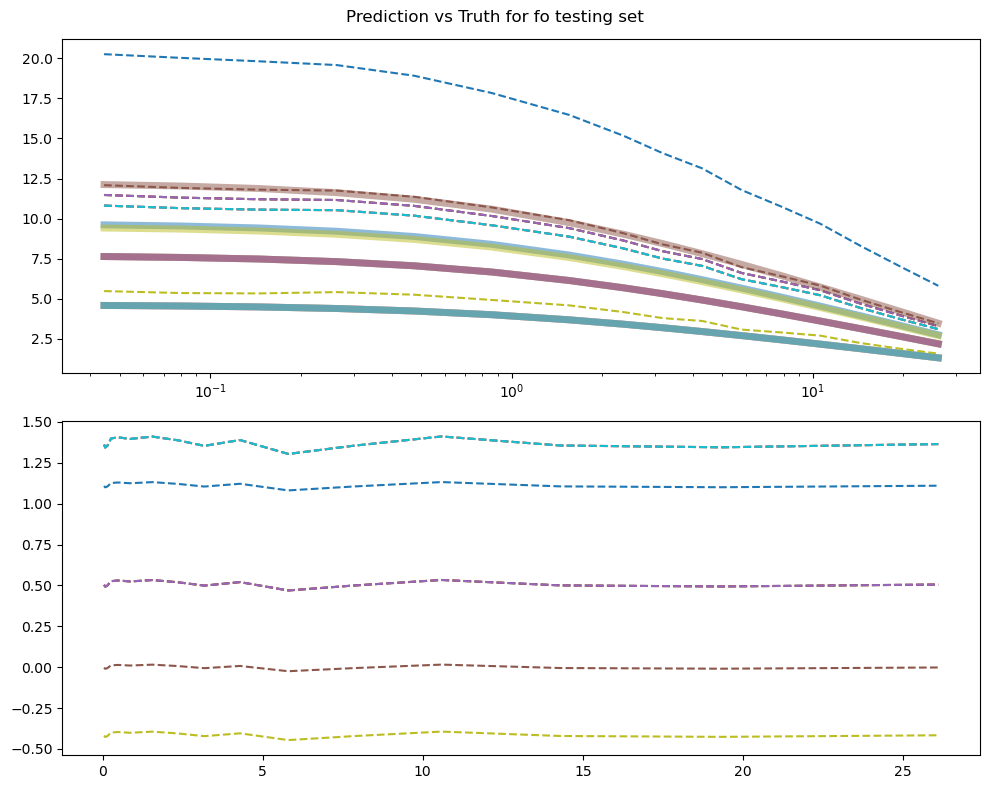

In [4]:
import importlib
import plot
import numpy as np
importlib.reload(plot)


plot_test = plot.PlotTestEmus()

#plot_test.pred_truth()
plot_test.pred_truth(X=np.random.uniform(0, 1, (5, 10)))

## The simeplest 1D GP with GPFlow:

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │ value   │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 1.0     │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (1,)    │ float64 │ [0.5]   │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 1.0     │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

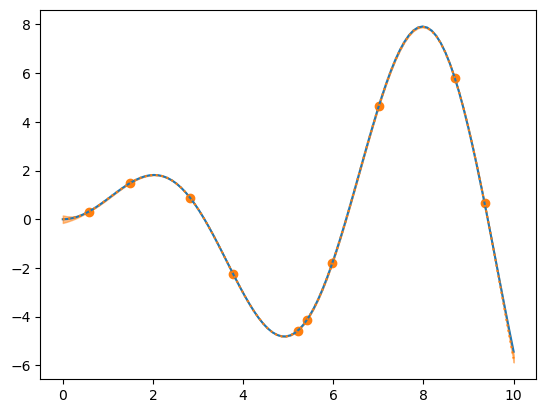

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import gpflow
from gpflow.models import GPR
from gpflow.kernels import SquaredExponential
from gpflow.optimizers import Scipy
from gpflow.utilities import print_summary
import tensorflow as tf
from tensorflow.keras.losses import mean_squared_error

def get_truth(X):

    return X * np.sin(X)

def build_model(X_train, Y_train):
    """
    """
    initial_lengthscales = 0.5*np.ones(X_train.shape[1])
    kernel = SquaredExponential(lengthscales=initial_lengthscales)
    kernel.lengthscales.trainable = True
    kernel.variance.trainable = True
    model = GPR(data=(X_train, Y_train), kernel=kernel)
    print(print_summary(model))
    return model
    
def train_model(model):
    """
    """
    opt = Scipy()
    opt_logs = opt.minimize(model.training_loss, variables=model.trainable_variables, options=dict(maxiter=1e11))
    return model


fig, ax = plt.subplots()

n_samples = 10

X_train = np.random.uniform(0, 10, (n_samples, 1))
Y_train = get_truth(X_train)

model = build_model(X_train, Y_train)
model = train_model(model)

X_test = np.linspace(0, 10, 100)[:, None]

truth = get_truth(X_test)
ax.plot(X_test, truth)

mean, var = model.predict_y(X_test)

ax.scatter(X_train, Y_train, color='C1')

ax.plot(X_test, mean, color='C1', ls='dotted')
ax.fill_between(X_test.squeeze(), (mean-np.sqrt(var)).numpy().squeeze(), (mean+np.sqrt(var)).numpy().squeeze(), alpha=0.5, color='C1')




print(f'lenghtscales: {model.kernel.lengthscales.numpy()}, variance: {model.kernel.variance.numpy()}')
    

In [4]:
X_train.shape

(10, 1)